In [1]:
from zipfile import ZipFile
file_name = 'Datasets.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [2]:
!rm -rf Datasets.zip

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
#re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = 'Datasets/train'
test_path = 'Datasets/test'

In [5]:
#importing resnet 50 lib and removing last layer of softmax
#here we also adding weight of imagenet

resnet = ResNet50(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
#don't train existing weights,beacaus we just need to train last layer only
for layer in resnet.layers:
    layer.trainable = False

In [14]:
#usefull to get number of classes

folders = glob('Datasets/Train/*')

In [15]:
folders

['Datasets/Train/mercedes',
 'Datasets/Train/audi',
 'Datasets/Train/lamborghini']

In [10]:
#our last layer
x = Flatten()(resnet.output)

In [17]:
prediction = Dense(len(folders),activation='softmax')(x)

#created a model object
model = Model(inputs = resnet.input,outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [20]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [21]:
#provide target same as that of cnn input
train_set = train_datagen.flow_from_directory("Datasets/Train",
                                             target_size = (224,224),
                                             batch_size = 30,
                                             class_mode = 'categorical')

Found 87 images belonging to 3 classes.


In [22]:
#provide target same as that of cnn input
test_set = test_datagen.flow_from_directory("Datasets/Test",
                                             target_size = (224,224),
                                             batch_size = 30,
                                             class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [23]:
r = model.fit_generator(
            train_set,
            validation_data = test_set,
            epochs = 50,
            steps_per_epoch=len(train_set),
            validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
3/3 [==============================] - 18s 6s/step - loss: 7.9600 - accuracy: 0.2874 - val_loss: 8.1458 - val_accuracy: 0.3276
Epoch 2/50
3/3 [==============================] - 17s 6s/step - loss: 5.8099 - accuracy: 0.3563 - val_loss: 6.7447 - val_accuracy: 0.5172
Epoch 3/50
3/3 [==============================] - 17s 6s/step - loss: 6.5170 - accuracy: 0.3678 - val_loss: 5.2827 - val_accuracy: 0.1552
Epoch 4/50
3/3 [==============================] - 17s 6s/step - loss: 2.0827 - accuracy: 0.4023 - val_loss: 3.4288 - val_accuracy: 0.3276
Epoch 5/50
3/3 [==============================] - 17s 6s/step - loss: 3.3600 - accuracy: 0.4023 - val_loss: 1.5948 - val_accuracy: 0.5862
Epoch 6/50
3/3 [==============================] - 17s 6s/step - loss: 2.2668 - accuracy: 0.4713 - val_loss: 3.4072 - val_accuracy: 0.1552
Epoch 7/50
3/3 [==============================] - 18s 6s/step - loss: 1.7954 - accuracy: 0.5172 - val_loss: 1.2213 - val_accuracy: 0.5517
Epoch 8/50
3/3 [==================

In [24]:
r.history

{'accuracy': [0.28735631704330444,
  0.3563218414783478,
  0.36781609058380127,
  0.40229883790016174,
  0.40229883790016174,
  0.4712643623352051,
  0.517241358757019,
  0.4597701132297516,
  0.6321839094161987,
  0.6896551847457886,
  0.5632184147834778,
  0.6551724076271057,
  0.6206896305084229,
  0.6781609058380127,
  0.7356321811676025,
  0.7931034564971924,
  0.8160919547080994,
  0.8160919547080994,
  0.8045976758003235,
  0.7931034564971924,
  0.8505747318267822,
  0.8505747318267822,
  0.8735632300376892,
  0.8850574493408203,
  0.8735632300376892,
  0.8275862336158752,
  0.8965517282485962,
  0.9080459475517273,
  0.8850574493408203,
  0.8390804529190063,
  0.8160919547080994,
  0.8275862336158752,
  0.8620689511299133,
  0.8275862336158752,
  0.8965517282485962,
  0.8735632300376892,
  0.9195402264595032,
  0.954023003578186,
  0.9425287246704102,
  0.9195402264595032,
  0.931034505367279,
  0.9425287246704102,
  0.9195402264595032,
  0.9080459475517273,
  0.839080452919006

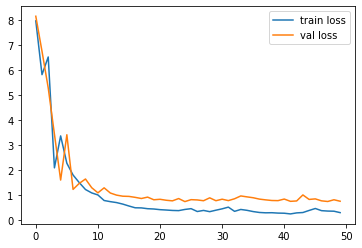

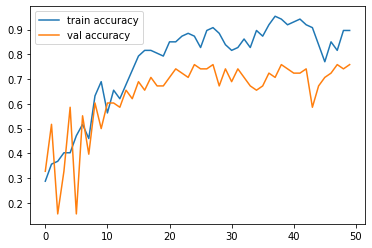

<Figure size 432x288 with 0 Axes>

In [25]:
#plot loss
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()
plt.savefig('loss')

#plot accuracy
plt.plot(r.history['accuracy'],label = 'train accuracy')
plt.plot(r.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy')

In [26]:
from tensorflow.keras.models import load_model

model.save('model_resnet50')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_resnet50/assets


In [27]:
y_predict = model.predict(test_set)

In [28]:
import numpy as np
y_prdict = np.argmax(y_predict)
y_prdict

41

In [31]:
img = image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [32]:
x = image.img_to_array(img)
x.shape
x = x/255

In [33]:
model = load_model('model_resnet50')

In [34]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
a = np.argmax(model.predict(img_data),axis=1)
a

array([1])